In [1]:
import keras 
import tensorflow as tf
import keras.backend.tensorflow_backend as K
from PIL import Image
from imutils import paths
from os import path
from keras.optimizers import Adam,RMSprop
import pandas as pd
keras.__version__
IMAGE_DIMS = (375,250,3)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

In [3]:
date_arr = np.load('./new_date_arr.npy',allow_pickle=True)
dust_arr = np.load('./ultra_PM_avg_31.npy',allow_pickle=True)
test_arr = np.load('./new_test_date.npy',allow_pickle=True)
wind_arr = np.load('./wind_arr.npy',allow_pickle=True)
humi_arr = np.load('./humi_arr.npy',allow_pickle=True)

In [4]:
import time

start = time.time() 
imagePaths = sorted(list(paths.list_images('./dataset/image')))
image_arr = []

for i in imagePaths:
    img_name = int(path.splitext(path.basename(i))[0])
    
    if img_name in date_arr :
        if img_name in test_arr:
            image = Image.open(i)
            image_crop = image.crop([380,0,600,200])
            image_crop = image_crop.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
            image = image.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
            image = np.concatenate((image_crop,image),axis=2)
            image = img_to_array(image)
            image_arr.append(image)
#         image = Image.open(i)
#         image = image.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
#         image = img_to_array(image)
#         image_arr.append(image)
        
image_arr = np.array(image_arr, dtype="float") / 255.0        
print("[INFO] data matrix: {} images ({:.2f}MB)".format(len(imagePaths), image_arr.nbytes / (1024 * 1000.0)))

[INFO] data matrix: 18126 images (9808.59MB)


In [5]:
from sklearn.utils import shuffle



con_data_img = image_arr
con_data_val = dust_arr

print(wind_arr.shape)
con_data_wea = np.concatenate([wind_arr.reshape(len(wind_arr),1),humi_arr.reshape(len(humi_arr),1)], axis=1)


# 국내는 PM2.5이 16이상이면 보통
# for i in range(0,dustvalue.shape[0]):
#     if int(dustvalue[i]) > 0 :
#         con_data_img.append(data[i])
#         con_data_val.append(dustvalue[i])
#         con_data_wea.append(add_info[i])
        
con_data_img, con_data_val, con_data_wea = shuffle(np.array(con_data_img), np.array(con_data_val), np.array(con_data_wea), random_state=0)
con_data_img = np.array(con_data_img)
con_data_val = np.array(con_data_val)
con_data_wea = np.array(con_data_wea)

num = int(con_data_img.shape[0]*0.80)

train_img = con_data_img[:num]
train_val = con_data_val[:num]
train_wea = con_data_wea[:num]

test_img = con_data_img[num:]
test_val = con_data_val[num:]
test_wea = con_data_wea[num:]

print(con_data_img.shape)
print(train_img.shape)
print(test_img.shape)

print(con_data_img.shape)
print(con_data_val.shape)
print(con_data_wea.shape)


(11156,)
(11156, 250, 375, 6)
(8924, 250, 375, 6)
(2232, 250, 375, 6)
(11156, 250, 375, 6)
(11156,)
(11156, 2)


In [7]:
from keras.models import Model, Sequential
from keras.layers import Input, LSTM, GRU, Embedding
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

model= keras.models.load_model('lstm-roi-ultra-PM-200-31-2.model')


Instructions for updating:
Use tf.cast instead.
Epoch 1/200
8924/8924 [==============================] - 52s 6ms/step - loss: 98.0604 - acc: 0.0024
Epoch 2/200
8924/8924 [==============================] - 43s 5ms/step - loss: 32.7652 - acc: 0.0037
Epoch 3/200
8924/8924 [==============================] - 42s 5ms/step - loss: 29.0930 - acc: 0.0022
Epoch 4/200
8924/8924 [==============================] - 42s 5ms/step - loss: 24.6186 - acc: 0.0046
Epoch 5/200
8924/8924 [==============================] - 42s 5ms/step - loss: 21.3872 - acc: 0.0029
Epoch 6/200
8924/8924 [==============================] - 42s 5ms/step - loss: 20.3121 - acc: 0.0029
Epoch 7/200
8924/8924 [==============================] - 43s 5ms/step - loss: 15.8555 - acc: 0.0036
Epoch 8/200
8924/8924 [==============================] - 42s 5ms/step - loss: 15.4704 - acc: 0.0035
Epoch 9/200
8924/8924 [==============================] - 42s 5ms/step - loss: 11.6416 - acc: 0.0039
Epoch 10/200
8924/8924 [============================

8924/8924 [==============================] - 42s 5ms/step - loss: 0.5129 - acc: 0.0201
Epoch 162/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.4664 - acc: 0.0201
Epoch 163/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.3491 - acc: 0.0219
Epoch 164/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.3440 - acc: 0.0239
Epoch 165/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.3687 - acc: 0.0219
Epoch 166/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.3715 - acc: 0.0219
Epoch 167/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.4795 - acc: 0.0230
Epoch 168/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.4695 - acc: 0.0225
Epoch 169/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.5863 - acc: 0.0187
Epoch 170/200
8924/8924 [==============================] - 42s 5ms/step - loss: 0.4614 - acc: 0.0230
Epoc

In [8]:
print(image_arr.shape)
print(dust_arr.shape)

print(wind_arr.shape)
print(humi_arr.shape)

print(test_img.shape)
print(test_wea.shape)

print(model.predict([test_img, test_wea]))

y_pred = np.squeeze(np.round(model.predict([test_img, test_wea]).astype(np.int64)))

print(test_val.shape)
print(y_pred.shape)

(11156, 250, 375, 6)
(11156,)
(11156,)
(11156,)
(2232, 250, 375, 6)
(2232, 2)
[[ 2.087648  ]
 [15.147841  ]
 [44.864555  ]
 ...
 [ 9.232728  ]
 [ 7.1760426 ]
 [ 0.06189197]]
(2232,)
(2232,)


In [9]:
# print(con_data_val.shape)
# print(train_val.shape)
# print(test_val.shape)
print(con_data_img.shape)
print(con_data_val.shape)
print(con_data_wea.shape)

(11156, 250, 375, 6)
(11156,)
(11156, 2)


In [10]:
RMSE = mean_squared_error(test_val.astype(np.int64), y_pred)**0.5
R2SCORE = r2_score(test_val.astype(np.int64), y_pred)

print("RMSE 는 : " , RMSE)
print("R2SCORE 는 : ", R2SCORE)

RMSE 는 :  1.2583057392117916
R2SCORE 는 :  0.98153373563189


Text(70, 50, 'R-squared = 0.98')

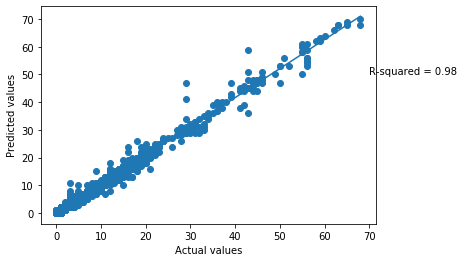

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

test_val=np.squeeze(test_val.astype(np.int64))

plt.scatter(test_val,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(test_val), np.poly1d(np.polyfit(test_val, y_pred, 1))(np.unique(test_val)))

plt.text(70, 50, 'R-squared = %0.2f' % R2SCORE)

In [12]:
np.round(test_val.astype(np.int64))
np.where(test_val >50)

(array([  77,  125,  192,  245,  357,  485,  521,  546,  641,  775,  825,
         907,  964,  986, 1050, 1244, 1280, 1433, 1547, 1629, 1680, 1681,
        1855, 2075, 2171], dtype=int64),)

예측값 :  30
실제값 :  30


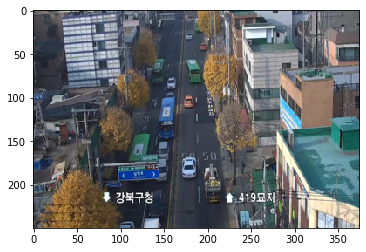

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
i=2083

plt.imshow(test_img[i][:,:,3:])
print("예측값 : ", y_pred[i])
print("실제값 : ", test_val[i])

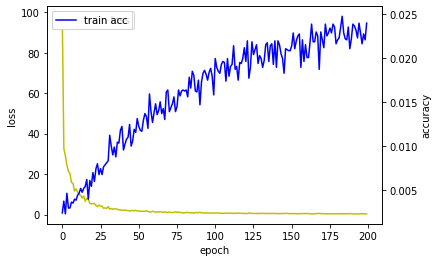

In [14]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(H.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(H.history['acc'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()